In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Enter value for Glucose: 3
Enter value for BloodPressure: 2
Enter value for Insulin: 1
Enter value for Age: 4
Enter value for BMI: 5
Enter value for Pregnancies: 6
Enter value for SkinThickness: 7
Plotting data...


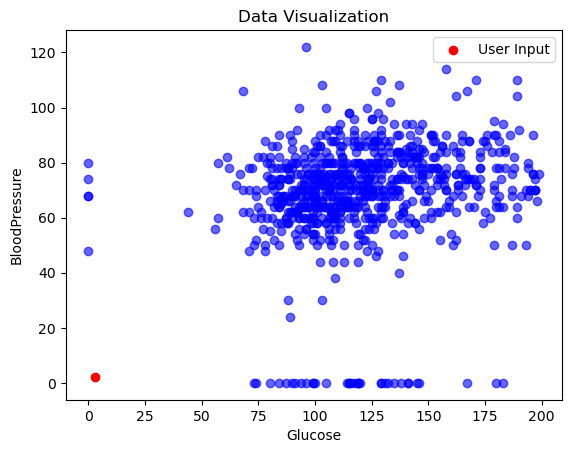

Probability of having diabetes: 10.00%


In [2]:
df = pd.read_csv('diabetes.csv')

# Function to calculate the probability of having diabetes
def calculate_probability(user_values, filtered_df, variables):
    # Simple probability calculation (just for demonstration)
    # You should use an appropriate probability model based on your dataset and domain knowledge
    # This is a simple example assuming a threshold for high probability

    threshold_values = [filtered_df[var].mean() + filtered_df[var].std() for var in variables]

    probability = 0.0
    if all(user_val > threshold_val for user_val, threshold_val in zip(user_values, threshold_values)):
        probability = 0.8  # High probability
    elif any(user_val > threshold_val for user_val, threshold_val in zip(user_values, threshold_values)):
        probability = 0.4  # Medium probability
    else:
        probability = 0.1  # Low probability

    return probability

# Display variable options and prompt the user for input
variables = ['Glucose', 'BloodPressure', 'Insulin', 'Age', 'BMI', 'Pregnancies', 'SkinThickness']
user_values = []

# Prompt the user for input values
for var in variables:
    user_val = float(input(f"Enter value for {var}: "))
    user_values.append(user_val)

# Filter the dataset based on all the variables
filtered_df = df[variables]

# Plot the data
print("Plotting data...")
plt.scatter(filtered_df[variables[0]], filtered_df[variables[1]], c='blue', alpha=0.6)
plt.scatter(user_values[0], user_values[1], c='red', marker='o', label='User Input')
plt.xlabel(variables[0])
plt.ylabel(variables[1])
plt.legend()
plt.title('Data Visualization')
plt.show()

# Calculate the probability of having diabetes
probability = calculate_probability(user_values, filtered_df, variables)
print(f"Probability of having diabetes: {probability:.2%}")

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = pd.read_csv("diabetes.csv")


X = df.drop('Outcome', axis=1)
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


def predict_diabetes():
    pregnancies = float(input("Enter how many times have you been pregnant?: "))
    glucose = float(input("Enter your Glucose level: "))
    blood_pressure = float(input("Enter your Blood Pressure: "))
    skin_thickness = float(input("Enter your Skin Thickness: "))
    insulin = float(input("Enter your Insulin level: "))
    bmi = float(input("Enter your BMI: "))
    diabetes_pedigree_function = float(input("Enter Diabetes Pedigree Function: "))
    age = float(input("Enter your Age: "))

    
    user_data = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]],
                             columns=X.columns)
    
    prediction_prob = model.predict_proba(user_data)

    prediction = model.predict(user_data)

    if prediction[0] == 0:
        print("Based on the input, it is predicted that you do not have diabetes.")
    else:
        print("Based on the input, it is predicted that you may have diabetes.")
    
    print("\nProbability of having diabetes: {:.2%}".format(prediction_prob[0, 1]))

predict_diabetes()

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Enter how many times have you been pregnant?: 31
Enter your Glucose level: 21
Enter your Blood Pressure: 21
Enter your Skin Thickness: 21
Enter your Insulin level: 21
Enter your BMI: 21
Enter Diabetes Pedigree Function: 21
Enter your Age: 21
Based on the input, it is predicted that you may have diabetes.

Probability of having diabetes: 99.99%
